
✅ Test Accuracy on SAVEE (filtered): 0.1333

              precision    recall  f1-score   support

       angry       0.05      0.07      0.06        60
     disgust       0.00      0.00      0.00        60
     fearful       0.00      0.00      0.00        60
       happy       0.14      0.87      0.24        60
     neutral       0.33      0.07      0.11       120
         sad       0.00      0.00      0.00        60
   surprised       0.00      0.00      0.00        60

    accuracy                           0.13       480
   macro avg       0.07      0.14      0.06       480
weighted avg       0.11      0.13      0.06       480



C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

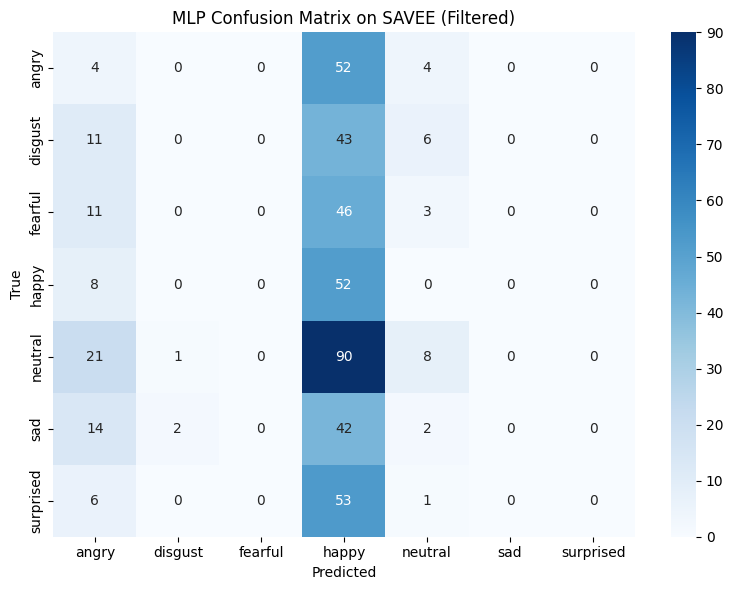

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# --- Step 0: Load Data and Model ---
savee_df = pd.read_csv("features_savee_pruned.csv")
mlp_model = joblib.load("mlp_pruned_model.joblib")
label_encoder = joblib.load("label_encoder.joblib")

# --- Step 1: Define and filter to common labels (SAVEE has no 'calm') ---
common_labels = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
filtered_df = savee_df[savee_df["label"].isin(common_labels)].copy()

# --- Step 2: Prepare inputs ---
X_test = filtered_df.drop(columns=[col for col in ["label", "filename", "predicted"] if col in filtered_df.columns])
y_true = filtered_df["label"]
y_true_encoded = label_encoder.transform(y_true)

# --- Step 3: Predict ---
y_pred = mlp_model.predict(X_test)

# --- Step 4: Evaluate using only present labels ---
acc = accuracy_score(y_true_encoded, y_pred)
print(f"\n✅ Test Accuracy on SAVEE (filtered): {acc:.4f}\n")

labels_present = sorted(set(y_true))  # e.g., ['angry', ..., 'surprised']
indices = [list(label_encoder.classes_).index(lbl) for lbl in labels_present]

print(classification_report(y_true_encoded, y_pred, labels=indices, target_names=labels_present))

# --- Step 5: Confusion Matrix ---
cm = confusion_matrix(y_true_encoded, y_pred, labels=indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_present,
            yticklabels=labels_present)
plt.title("MLP Confusion Matrix on SAVEE (Filtered)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()




In [2]:
print(savee_df["label"].value_counts())
print(label_encoder.classes_)

label
neutral      120
disgust       60
angry         60
fearful       60
happy         60
sad           60
surprised     60
Name: count, dtype: int64
['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']



Test Accuracy on SAVEE (filtered): 0.1333

              precision    recall  f1-score   support

       angry       0.05      0.07      0.06        60
     disgust       0.00      0.00      0.00        60
     fearful       0.00      0.00      0.00        60
       happy       0.14      0.87      0.24        60
     neutral       0.33      0.07      0.11       120
         sad       0.00      0.00      0.00        60
   surprised       0.00      0.00      0.00        60

    accuracy                           0.13       480
   macro avg       0.07      0.14      0.06       480
weighted avg       0.11      0.13      0.06       480



C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jbkee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

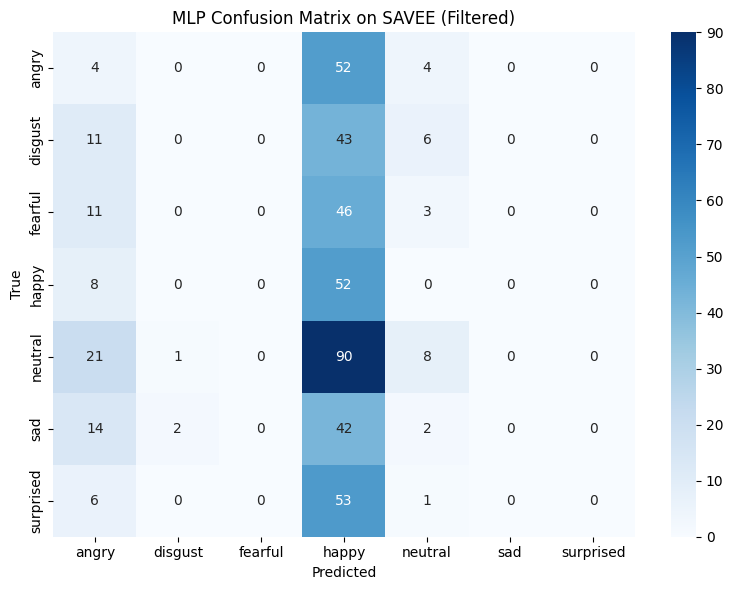

In [3]:
# Step 1: Define common labels
common_labels = ['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

# Step 2: Filter SAVEE to only use those labels
filtered_df = savee_df[savee_df["label"].isin(common_labels)].copy()

# Step 3: Prepare inputs
X_test = filtered_df.drop(columns=["label", "filename"], errors="ignore")
y_true = filtered_df["label"]

# Step 4: Encode true labels
y_true_encoded = label_encoder.transform(y_true)

# Step 5: Predict
y_pred = mlp_model.predict(X_test)

# Step 6: Evaluate only on present classes
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

acc = accuracy_score(y_true_encoded, y_pred)
print(f"\nTest Accuracy on SAVEE (filtered): {acc:.4f}\n")

# Restrict report to only classes present in y_true
labels_present = sorted(set(y_true))
indices = [list(label_encoder.classes_).index(lbl) for lbl in labels_present]

# Classification report
print(classification_report(y_true_encoded, y_pred, labels=indices, target_names=labels_present))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_encoded, y_pred, labels=indices)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_present, yticklabels=labels_present)
plt.title("MLP Confusion Matrix on SAVEE (Filtered)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()
